#Becoming an independent data scientist
##Georges BODIONG

##Region and domain

This assignment is based on west Africa. It spans four countries, notably Cameroon, Nigeria, Tchad and Niger. The domain category is **Military expenditures** relative to GDP.

*NB: Originally, I was supposed to work on **religious events or traditions**. Unfortunately, there are no publicly available datasets on the specified region (or I'm simply not aware of any). So I had to change subject.*

##Research question

Has the war against **Boko Haram** significantly affected military expenditures by these countries?

For those not familiar with the case, **Boko Haram** is a nigerian extremist group that pledged allegiance to the **Islamic State**. They started wrecking havoc in northern Nigeria as far back as 2009, and they have since expanded their activities to neighboring countries. There is a full-fledged war going on since 2013 in the region. 

The assumption is that **to defend themselves, these countries have increased their arms imports**

##Links

I've scraped the following datasets from the [World Bank Website](data.worldbank.org) before uploading them to [my Github account](https://github.com/deegeorgie):
- [The GDP dataset](https://github.com/deegeorgie/Last-Plotting-assignment/blob/master/API_CMR.csv)
- [The military expenditures dataset](https://github.com/deegeorgie/Last-Plotting-assignment/blob/master/API_MIL.csv)

The [last dataset](https://github.com/deegeorgie/Last-Plotting-assignment/blob/master/API_MIL_BUDGET.csv) is from the **Stockholm International Peace Research Institute (SIPRI)**. It outlines military budgets for sub-saharan countries from the 60's.

Of course, I've used these datasets to come out with [one](https://github.com/deegeorgie/Last-Plotting-assignment/blob/master/MIL_EXP.csv) that suits the needs of this study.


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

gdp_data = pd.read_csv('API_GDP.csv', skiprows=4)
gdp_data = gdp_data.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1).set_index('Country Name')

#I'm interested in four countries

#GDP of Cameroon
cmr_gdp = gdp_data.ix[['Cameroon'], :]

#GDP of Nigeria
ngr_gdp = gdp_data.ix[['Nigeria'], :]

#GDP Chad
chad_gdp = gdp_data.ix[['Chad'], :]

#GDP Niger
niger_gdp = gdp_data.ix[['Niger'], :]

niger_gdp

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
Niger,449526872.6,485785231.7,531736599.9,586294879.5,582816396.2,673383510.2,702296079.9,665586872.8,641214226.8,625867984.4,...,4291363391,5403363917,5397121856,5718589799,6409169890,6942209595,7667951988,8245312137,7142951342,7508986509


In [51]:
#We need to put a dataframe together with values necessary for our research question
from datetime import datetime

#Let's extract GDP values for each country
years = pd.to_datetime(cmr_gdp.columns)

#Cameroon
cmr1 = cmr_gdp.values
cmr_gdp1 = cmr1[0]

#Nigeria
ngr1 = ngr_gdp.values
ngr_gdp1 = ngr1[0]

#Niger
ng1 = niger_gdp.values
niger_gdp1 = ng1[0]

#Chad
ch1 = chad_gdp.values
chad_gdp1 = ch1[0]

GDP_df = pd.DataFrame({
        'GDP_CMR ($US)': cmr_gdp1,
        'GDP_NGR ($US)': ngr_gdp1,
        'GDP_NIGER ($US)': niger_gdp1,
        'GDP_CHAD ($US)': chad_gdp1
    }, index=years)
GDP_df.tail()

,GDP_CHAD ($US),GDP_CMR ($US),GDP_NGR ($US),GDP_NIGER ($US)
2012-01-01,12368071039,26472056038,4.609540e+11,6942209595
2013-01-01,12949854263,29567504655,5.149660e+11,7667951988
2014-01-01,13922223234,32050817633,5.684990e+11,8245312137
2015-01-01,10888798114,28415950981,4.810660e+11,7142951342
2016-01-01,9600761474,24204448567,4.050830e+11,7508986509


In [52]:
def convert_gdp(x):
    g = x /1000000
    return g

GDP_df['GDP_CHAD ($US)'] = GDP_df['GDP_CHAD ($US)'].map(convert_gdp)
GDP_df['GDP_CMR ($US)'] = GDP_df['GDP_CMR ($US)'].map(convert_gdp)
GDP_df['GDP_NGR ($US)'] = GDP_df['GDP_NGR ($US)'].map(convert_gdp)
GDP_df['GDP_NIGER ($US)'] = GDP_df['GDP_NIGER ($US)'].map(convert_gdp)
GDP_df.tail()

,GDP_CHAD ($US),GDP_CMR ($US),GDP_NGR ($US),GDP_NIGER ($US)
2012-01-01,12368.071039,26472.056038,460954,6942.209595
2013-01-01,12949.854263,29567.504655,514966,7667.951988
2014-01-01,13922.223234,32050.817633,568499,8245.312137
2015-01-01,10888.798114,28415.950981,481066,7142.951342
2016-01-01,9600.761474,24204.448567,405083,7508.986509


In [53]:
#Let's include the military expenditures for each country
mil_exp = pd.read_csv('API_MIL_BUDGET.csv').replace(['xxx', '. .', '..'], 'NA')

dates_before_1960 = range(1949, 1960)
mil_exp = mil_exp.drop(['Unnamed: 1', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959'], axis=1).set_index('Country')
mil_exp.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,,,,,,,,,
Angola,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,2032,3164,3311,3501,3639,4145,6091,6842,3608,2824
Benin,1.3,2.2,2.7,3.0,3.8,4.0,3.7,3.9,4.3,4.0,...,NA,64.7,NA,NA,NA,78.2,86.0,93.0,90.9,98.1
Botswana,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,306,332,330,349,363,327,306,346,384,514
Burkina Faso,1.3,1.6,4.9,5.3,5.4,3.5,3.9,3.7,3.8,4.0,...,108,117,127,124,139,148,166,177,148,149
Burundi,NA,NA,8.4,1.0,1.2,2.2,2.3,2.4,2.6,3.3,...,46.3,43.9,NA,NA,NA,59.0,60.9,62.2,66.2,66.5


In [54]:
mil_exp = mil_exp.ix[['Cameroon', 'Nigeria', 'Niger', 'Chad'], :]
mil_exp

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,,,,,,,,,
Cameroon,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,297,347,343,354,347,354,393,402,354,387
Nigeria,23.4,28.3,38.6,45.5,54.3,65.9,55.7,240,369,684,...,971,1616,1504,1990,2385,2316,2419,2358,2066,1723
Niger,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,53.6,53.0,66.9,83.9,148.9,106.1,NA,NA,166
Chad,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,389,611,739,616,610,NA,726,392,221,267


In [55]:
cmr_exp = mil_exp.ix[['Cameroon'], :]
ngr_exp = mil_exp.ix[['Nigeria'], :]
niger_exp = mil_exp.ix[['Niger'], :]
chad_exp = mil_exp.ix[['Chad'], :]

In [56]:
GDP_df['CMR_EXP ($US M)'] = cmr_exp.values[0]
GDP_df['NGR_EXP ($US M)'] = ngr_exp.values[0]
GDP_df['NIGER_EXP ($US M)'] = niger_exp.values[0]
GDP_df['CHAD_EXP ($US M)'] = chad_exp.values[0]

In [62]:
#Convert above columns to float
def to_number(s):
    try:        
        s1 = float(s)
        return s1
    except ValueError:
        return s

In [65]:
GDP_df['CMR_EXP ($US M)'] = GDP_df['CMR_EXP ($US M)'].map(to_number)
GDP_df['NGR_EXP ($US M)'] = GDP_df['NGR_EXP ($US M)'].map(to_number)
GDP_df['NIGER_EXP ($US M)'] = GDP_df['NIGER_EXP ($US M)'].map(to_number)
GDP_df['CHAD_EXP ($US M)'] = GDP_df['CHAD_EXP ($US M)'].map(to_number)
GDP_df.dtypes

GDP_CHAD ($US)       float64
GDP_CMR ($US)        float64
GDP_NGR ($US)        float64
GDP_NIGER ($US)      float64
CMR_EXP ($US M)       object
NGR_EXP ($US M)      float64
NIGER_EXP ($US M)     object
CHAD_EXP ($US M)      object
dtype: object

In [66]:
#Let's add military expenses as a percentage of GDP
exp_gdp = pd.read_csv('API_MIL.csv', skiprows=4)
exp_gdp = exp_gdp.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1).set_index('Country Name')
exp_gdp.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.237069,2.328003,2.060751,1.897473,1.778593,1.144715,1.061433,1.334357,0.993454,0.892336
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.362232,3.758215,4.386129,4.244884,3.495619,3.593358,4.876032,5.400213,3.515939,2.948674
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.820765,1.984869,1.517217,1.558592,1.528266,1.487083,1.408458,1.347370,1.161953,1.229624
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
ccnn = exp_gdp.ix[['Cameroon', 'Chad', 'Nigeria', 'Niger'], :]
cmr_exp_gdp = ccnn.ix[['Cameroon']]
ngr_exp_gdp = ccnn.ix[['Nigeria']]
niger_exp_gdp = ccnn.ix[['Niger']]
chad_exp_gdp = ccnn.ix[['Chad']]

GDP_df['CMR_EXP (% GDP)'] = cmr_exp_gdp.values[0]
GDP_df['NGR_EXP (% GDP)'] = ngr_exp_gdp.values[0]
GDP_df['NIGER_EXP (% GDP)'] = niger_exp_gdp.values[0]
GDP_df['CHAD_EXP (% GDP)'] = chad_exp_gdp.values[0]

GDP_df.tail()

,GDP_CHAD ($US),GDP_CMR ($US),GDP_NGR ($US),GDP_NIGER ($US),CMR_EXP ($US M),NGR_EXP ($US M),NIGER_EXP ($US M),CHAD_EXP ($US M),CMR_EXP (% GDP),NGR_EXP (% GDP),NIGER_EXP (% GDP),CHAD_EXP (% GDP)
2012-01-01,12368.071039,26472.056038,460954,6942.209595,354,2316,148.9,NA,1.338949,0.502541,2.144357,NaN
2013-01-01,12949.854263,29567.504655,514966,7667.951988,393,2419,106.1,726,1.328623,0.469695,1.383215,5.609788
2014-01-01,13922.223234,32050.817633,568499,8245.312137,402,2358,NA,392,1.252789,0.414719,NaN,2.818393
2015-01-01,10888.798114,28415.950981,481066,7142.951342,354,2066,NA,221,1.245130,0.417637,NaN,2.029448
2016-01-01,9600.761474,24204.448567,405083,7508.986509,387,1723,166,267,1.600524,0.432488,2.213806,2.786067


In [68]:
from pandas import ExcelWriter
GDP_df.to_excel('MIL_EXP.xlsx')

#Data plotting and visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('MIL_EXP.csv').rename(columns={'Unnamed: 0' : 'Years'})
df.head()

C:\Users\owner\AppData\Roaming\Python\Python27\site-packages\pandas\core\computation\__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


,Years,GDP_CHAD ($US),GDP_CMR ($US),GDP_NGR ($US),GDP_NIGER ($US),CMR_EXP ($US M),NGR_EXP ($US M),NIGER_EXP ($US M),CHAD_EXP ($US M),CMR_EXP (% GDP),NGR_EXP (% GDP),NIGER_EXP (% GDP),CHAD_EXP (% GDP)
0,1960-01-01 00:00:00,313.582728,618.740988,4196.092258,449.526873,NaN,23.4,NaN,NaN,NaN,0.557174,NaN,NaN
1,1961-01-01 00:00:00,333.975337,657.597383,4467.200336,485.785232,NaN,28.3,NaN,NaN,NaN,0.633046,NaN,NaN
2,1962-01-01 00:00:00,357.635714,699.373701,4909.302954,531.736600,NaN,38.6,NaN,NaN,NaN,0.787061,NaN,NaN
3,1963-01-01 00:00:00,371.767003,723.624365,5165.489010,586.294879,NaN,45.5,NaN,NaN,NaN,0.880828,NaN,NaN
4,1964-01-01 00:00:00,392.247518,782.384528,5552.822484,582.816396,NaN,54.3,NaN,NaN,NaN,0.978222,NaN,NaN


In [2]:
from datetime import datetime

df['Years'] = pd.to_datetime(df['Years'])
df['CMR_EXP (% GDP)'].fillna(df['CMR_EXP (% GDP)'].mean(), inplace=True)
df['NIGER_EXP (% GDP)'].fillna(df['NIGER_EXP (% GDP)'].mean(), inplace=True)
df['CHAD_EXP (% GDP)'].fillna(df['CHAD_EXP (% GDP)'].mean(), inplace=True)


In [3]:
df = df.set_index('Years')

In [4]:
df.head()

,GDP_CHAD ($US),GDP_CMR ($US),GDP_NGR ($US),GDP_NIGER ($US),CMR_EXP ($US M),NGR_EXP ($US M),NIGER_EXP ($US M),CHAD_EXP ($US M),CMR_EXP (% GDP),NGR_EXP (% GDP),NIGER_EXP (% GDP),CHAD_EXP (% GDP)
Years,,,,,,,,,,,,
1960-01-01,313.582728,618.740988,4196.092258,449.526873,NaN,23.4,NaN,NaN,1.468188,0.557174,1.001674,3.058448
1961-01-01,333.975337,657.597383,4467.200336,485.785232,NaN,28.3,NaN,NaN,1.468188,0.633046,1.001674,3.058448
1962-01-01,357.635714,699.373701,4909.302954,531.736600,NaN,38.6,NaN,NaN,1.468188,0.787061,1.001674,3.058448
1963-01-01,371.767003,723.624365,5165.489010,586.294879,NaN,45.5,NaN,NaN,1.468188,0.880828,1.001674,3.058448
1964-01-01,392.247518,782.384528,5552.822484,582.816396,NaN,54.3,NaN,NaN,1.468188,0.978222,1.001674,3.058448


In [5]:
#We'll plot data for the last twenty years, from 1997 to 2016
data = df.ix['1997-01-01':'2016-01-01']

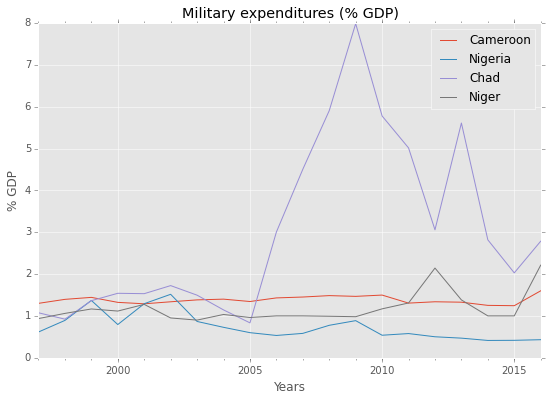

In [7]:
%matplotlib inline

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(9,6))
ax.set_title('Military expenditures (% GDP)')
#ax.set_title('Depenses Militaires (% du PIB)')
ax.set_ylabel('% GDP')
#ax.set_ylabel('% PIB')

data['CMR_EXP (% GDP)'].plot()
data['NGR_EXP (% GDP)'].plot()
data['CHAD_EXP (% GDP)'].plot()
data['NIGER_EXP (% GDP)'].plot()

ax.legend(['Cameroon', 'Nigeria', 'Chad', 'Niger'])
#ax.legend(['Cameroun', 'Nigeria', 'Tchad', 'Niger'])
#fig.savefig('mil_expenses.png')
fig.savefig('mil_expensesfrom97.png')
#plt.show()

This first graph shows that Chad is the country that spends the highest proportion of it's GDP on defense. Though Nigeria and Cameroon have seen a small increase in their expenditures, these countries clearly fall short on their military spending (if we apply the 2% NATO threshold). 

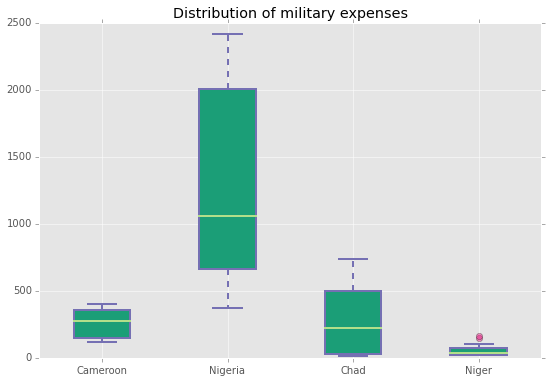

In [8]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot([data['CMR_EXP ($US M)'], data['NGR_EXP ($US M)'], data['CHAD_EXP ($US M)'].dropna(), data['NIGER_EXP ($US M)'].dropna() ], patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    
## Custom x-axis labels
ax.set_title('Distribution of military expenses')
ax.set_xticklabels(['Cameroon', 'Nigeria', 'Chad', 'Niger'])
# Save the figure
fig.savefig('mil_dist.png')